Rami LATIF

Huan Jie YEN

# <h1><center>Rapport SAE</center></h1>

## Introduction: 

Étudiants en BUT Passerelle et dans le cadre de notre SAE, nous entreprenons une analyse des données, issues de la plateforme Parcoursup pour la formation en Génie Electrique et Informatique Industriel (GEII).

Notre objectif est d’en extraire des résultats significatifs sur le candidat idéal pour cette formation, lesquels seront représentés par des visualisations.  

Ces démarches contribuent potentiellement à l’amélioration des processus de sélection.


### Sommaire: 

<li>
    <a href="#Stat">Statistiques globales sur les candidatures :</a>
    <ul>
        <li>États des dossiers</li>
        <li>Répartition des sexes</li>
        <li>Répartition des boursiers </li>
        <li>Types de Formations</li>
        <li>Types de Diplômes</li>
            <ul>
                <li>Autres Diplômes</li>
            </ul>
        </li>
    </ul>
</li>

<li>  
    <a href = "#StatD">Statistiques détaillées sur les candidatures : </a>
    <ul>
            <li>Série Générale (avant réforme) </li>
        <li>Série Technologique </li>
    <ul>
</li>

<div id="Stat">
    <h2><center>Satistiques globales sur les candidatures</center></h2>

Cette première partie de notre analyse se consacre à la présentation globale et  à la visualisation des données dans notre fichier originel. 

La base de données dont nous disposons contient diverses informations relatives aux étudiants, telles que leurs sexe, leur notes et biens d’autres variables. 

L'objectif est d'avoir une vue d'ensemble sur la composition des données, avant d’entreprendre tout processus d’analyse.
</div>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel("GEII_Anonyme.xlsx")

### Etats des dossiers

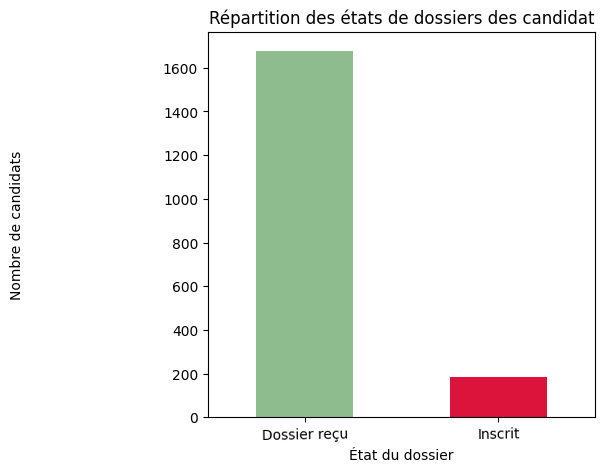

Classement ou état du dossier candidat à l'inscription - Libellé
Dossier reçu    1679
Inscrit          182
Name: count, dtype: int64


In [3]:
#Visualisations des données
Dossier = 'Classement ou état du dossier candidat à l\'inscription - Libellé'
comptage = df[Dossier].value_counts()

comptage.plot(kind='bar', color=['#8FBC8F', '#DC143C'], figsize=(5, 5))
plt.title('Répartition des états de dossiers des candidat')
plt.xlabel('État du dossier')
plt.ylabel('Nombre de candidats', labelpad=100)
plt.xticks(rotation=1) 
plt.show()
print(comptage)


### Répartition des sexes

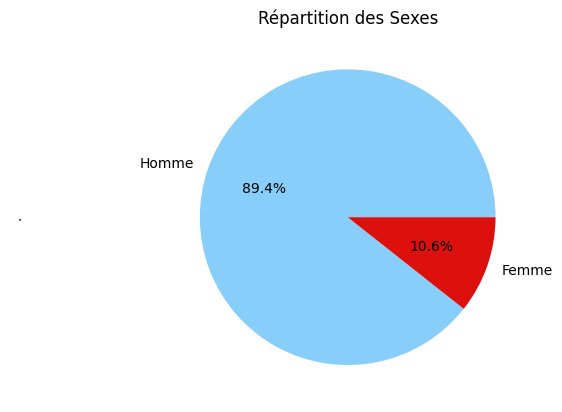

Civilité
Homme    1663
Femme     198
Name: count, dtype: int64


In [4]:
df['Civilité'] = df['Civilité'].replace({'Mme': 'Femme', 'M.': 'Homme'})

comptage = df['Civilité'].value_counts()
comptage.plot(kind='pie',autopct='%1.1f%%', colors=['#87CEFA','#DC100C'])

plt.title('Répartition des Sexes')
plt.ylabel('.',labelpad=100)
plt.show()
print(comptage)

### Répartition des Boursiers

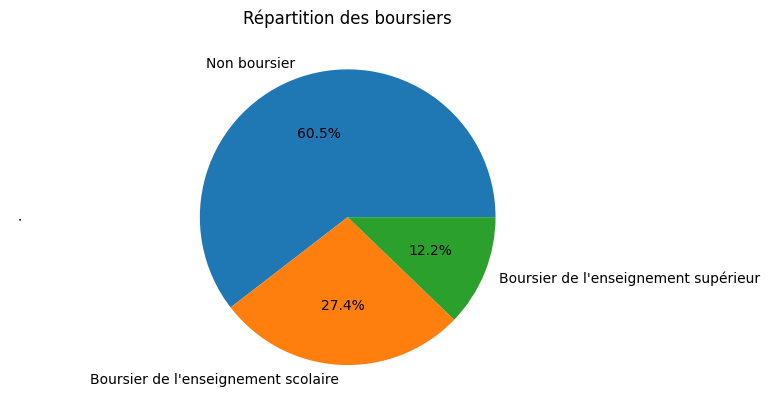

Candidat boursier - Libellé
Non boursier                            1125
Boursier de l'enseignement scolaire      509
Boursier de l'enseignement supérieur     227
Name: count, dtype: int64


In [5]:
comptage = df['Candidat boursier - Libellé'].value_counts()
comptage.plot(kind='pie',autopct='%1.1f%%')

plt.title('Répartition des boursiers')
plt.ylabel('.',labelpad=100)
plt.show()
print(comptage)

### Types de Formations

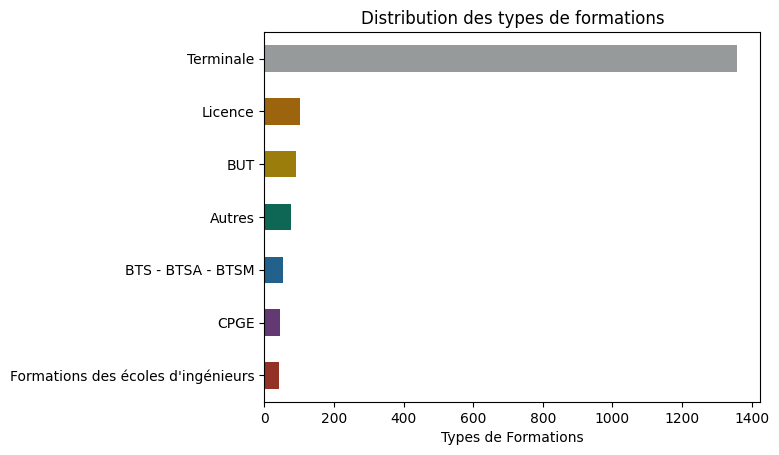

Type Formation - Libellé  2022/2023
Formations des écoles d'ingénieurs      42
CPGE                                    46
BTS - BTSA - BTSM                       53
Autres                                  77
BUT                                     90
Licence                                101
Terminale                             1357
Name: count, dtype: int64


In [6]:
TypeFormation = 'Type Formation - Libellé  2022/2023'
comptage = df[TypeFormation].value_counts()

a_remplacer = ['Autre formation du supérieur', 'Classe de remise à niveau (Scientifique, pour entrer en BTS, ...)',
               'Diplômes d\'université ou d\'établissement', 'Formations préparatoires à l\'enseignement supérieur',
    'Formations professionnelles','Licence professionnelle','Licence sélective', 'Année préparatoire au DAEU',
    'Première', 'DCG','Prépa autres écoles (Arts, Audiovisuel, Hôtellerie, ...)',
    'Master', 'Formations des écoles de commerce et de management', 'Formations d\'art, de design et du spectacle vivant',
    'Mentions complémentaires' ]

df[TypeFormation] = df[TypeFormation].replace(a_remplacer, "Autres")

couleurs = ['#943126', '#633974', '#21618C', '#0E6655', '#9A7D0A', '#9C640C', '#979A9A', '#212F3C', '#C0C0C0']

comptage = df[TypeFormation].value_counts(ascending=True)
comptage.plot(kind='barh', color=couleurs)
plt.title('Distribution des types de formations')
plt.xlabel('Types de Formations')
plt.ylabel('')

plt.show()
print(comptage)

### Types de Diplômes

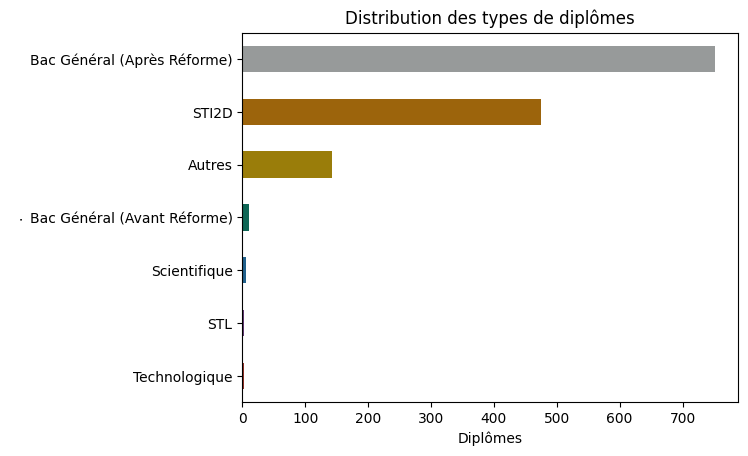

Série de classe - Libellé 2022/2023
Technologique                    2
STL                              3
Scientifique                     6
Bac Général (Avant Réforme)     11
Autres                         143
STI2D                          475
Bac Général (Après Réforme)    751
Name: count, dtype: int64


In [7]:
SérieClasse = 'Série de classe - Libellé 2022/2023'

remplacements = {
    'Série Générale': 'Bac Général (Après Réforme)',
    'Générale': 'Bac Général (Avant Réforme)',
    'Sciences et technologie de laboratoire': 'STL',
    'Sciences et Technologies de l\'Industrie et du Développement Durable': "STI2D",
    'Sciences et Technologies du Management et de la Gestion': "STMG"
    
}

a_remplacer = ['Economique et social', 'DAEU', 'Littéraire', 'Professionnelle',
    'Sciences et Technologies du Management et de la Gestion',
    'Sciences et technologies de la santé et du social',
    'Formation/Mention complémentaire', 'Année préparatoire en Université',
    'Baccalauréat International' ]


df[SérieClasse] = df[SérieClasse].replace(a_remplacer, "Autres")
df[SérieClasse] = df[SérieClasse].replace(remplacements)


comptage = df[SérieClasse].value_counts(ascending=True)


comptage.plot(kind='barh',color=couleurs)

plt.title('Distribution des types de diplômes')
plt.xlabel('Diplômes')
plt.ylabel('.')
plt.show()
print(comptage)

Dans cette histogramme, nous avons réunis les diplômes atypique dans la catégorie "Autre". 
L'histogramme ci-dessous représente la répartition de cette catégorie. 

### Diplômes "Autres"

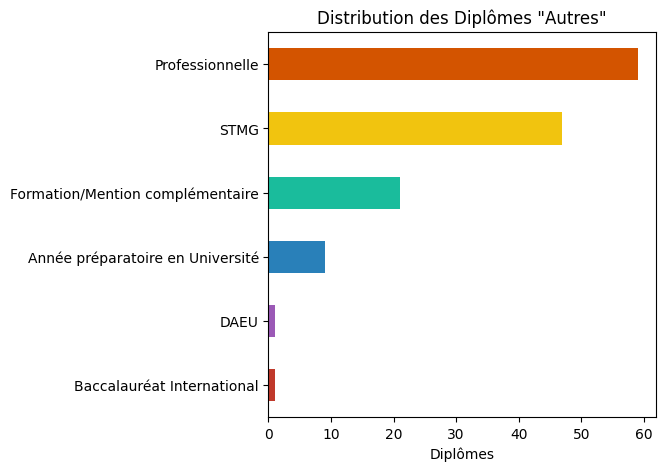

Série de classe - Libellé 2022/2023
Baccalauréat International           1
DAEU                                 1
Année préparatoire en Université     9
Formation/Mention complémentaire    21
STMG                                47
Professionnelle                     59
Name: count, dtype: int64


In [8]:
df = pd.read_excel("GEII_Anonyme.xlsx")

df[SérieClasse] = df[SérieClasse].replace(remplacements)


Spé_après_remp = ["ES", "DAEU", "L", "Professionnelle", "STMG", "ST2S", 
                  "Formation/Mention complémentaire", "Année préparatoire en Université", 
                  "Baccalauréat International"]


df_filtré = df[df[SérieClasse].isin(Spé_après_remp)]


comptage = df_filtré[SérieClasse].value_counts(ascending=True)



couleurs = ['#C0392B','#9B59B6','#2980B9', '#1ABC9C', '#F1C40F', '#D35400']
comptage.plot(kind='barh', color=couleurs, figsize=(5, 5))
plt.title('Distribution des Diplômes "Autres"')
plt.xlabel('Diplômes')
plt.ylabel('', labelpad=30)
plt.show()
print(comptage)


<div id="StatD">
    <h2><center>Satistiques détaillées sur les candidatures</center></h2>
</div>

### Statistiques sur la Série Générale: 

Dans cette seconde partie de notre rapport, nous approfondissons notre analyse en regroupant nos candidats par types de formations, avec un intérêt particulier pour ceux issus de la filière générale et de la filière STI2D, profils majoritaires aux vus de nos visualisations.

In [9]:
df = pd.read_excel("GEII_Anonyme.xlsx")

#On sélectionne les candidats issus de terminale générale qu'on sauvegarde dans le fichier  TerminaleGeneral.xlsx"
df_Générale = df[df['Série de classe - Libellé 2022/2023'] == 'Série Générale']

TerminaleGeneral = 'TerminaleGeneral.xlsx'
df_Générale.to_excel(TerminaleGeneral, index=False)


In [10]:
#On ajoute à notre nouveau fichier, une colonne département qui prends les deux premiers chiffre
#de la colonne "Coordonnées - Code commune"

df_Générale['Département'] = df_Générale['Coordonnées - Code commune'].apply(lambda x: str(x)[:2])

df_Générale.to_excel(TerminaleGeneral, index=False)

C:\Users\Rami\AppData\Local\Temp\ipykernel_16136\1815041926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Générale['Département'] = df_Générale['Coordonnées - Code commune'].apply(lambda x: str(x)[:2])


In [11]:
df_Générale = pd.read_excel("TerminaleGeneral.xlsx")

### a) Répartition géographique des candidats par département en Île-de-France

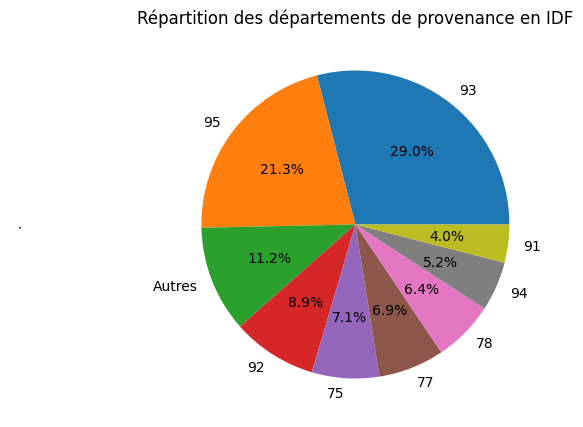

Département
93        218
95        160
Autres     84
92         67
75         53
77         52
78         48
94         39
91         30
Name: count, dtype: int64


In [12]:
# On stocke dans le tableau Autres, tout les départements qui ne sont pas d'IDF
Autre = []

# Boucle pour parcourir chaque valeur dans la colonne "Département"
for dept in df_Générale['Département']:
    if dept not in ['75', '77', '78', '91', '92', '93', '94', '95']:
        Autre.append(dept)

#On remplace tout ce qui n'est pas en IDF par Autres       
df_Générale['Département'] = df_Générale['Département'].replace(Autre, "Autres")

value_counts = df_Générale['Département'].value_counts()

# Le diagramme circulaire

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%' )
plt.title('Répartition des départements de provenance en IDF')
plt.ylabel('.', labelpad=100)
plt.show()



comptage = df_Générale['Département'].value_counts()
print(comptage)

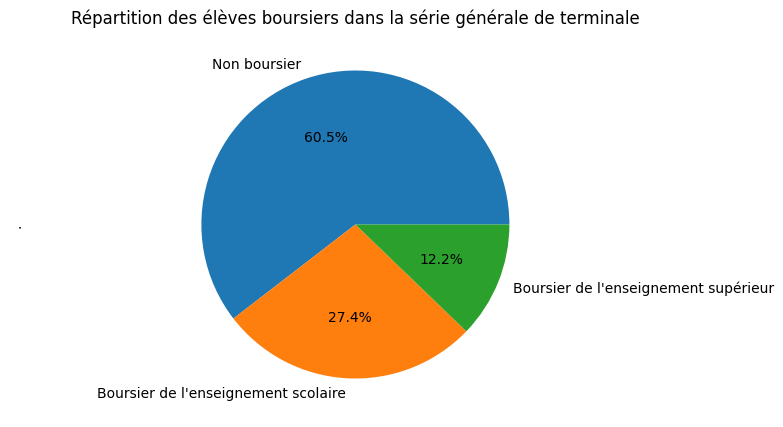

Candidat boursier - Libellé
Non boursier                            1125
Boursier de l'enseignement scolaire      509
Boursier de l'enseignement supérieur     227
Name: count, dtype: int64


In [13]:
counts = df['Candidat boursier - Libellé'].value_counts()

   
plt.figure(figsize=(5, 5)) 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Répartition des élèves boursiers dans la série générale de terminale')
plt.ylabel('.', labelpad=100)
plt.show()
print(counts)


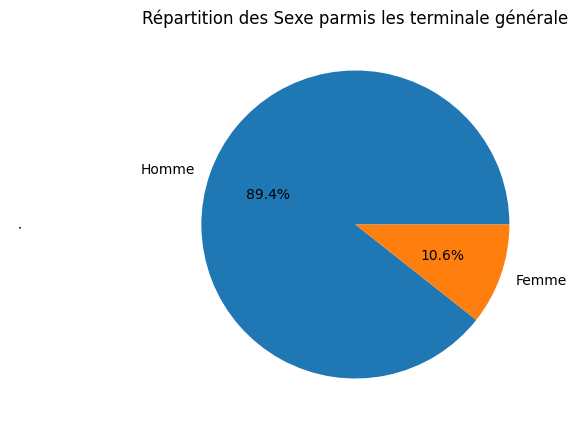

In [14]:
df['Civilité'] = df['Civilité'].replace({'Mme': 'Femme', 'M.': 'Homme'})
counts = df['Civilité'].value_counts()

   
plt.figure(figsize=(5, 5)) 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Répartition des Sexe parmis les terminale générale')
plt.ylabel('.', labelpad=100)
plt.show()



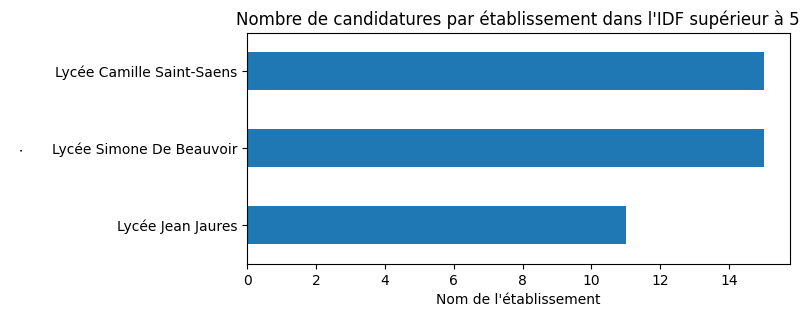

Nom Etablissement origine 2022/2023
Lycée Jean Jaures            11
Lycée Simone De Beauvoir     15
Lycée Camille Saint-Saens    15
Name: count, dtype: int64


In [15]:
IDF_95 = ['95']

df_IDF = df_Générale[df_Générale['Département'].isin(IDF_95)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF > 10]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.',labelpad=20)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)

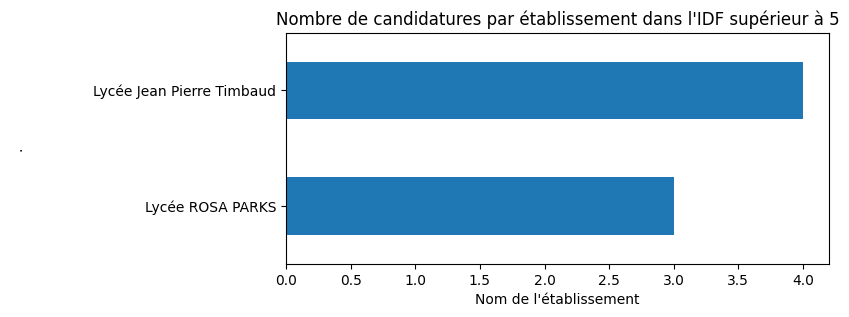

Nom Etablissement origine 2022/2023
Lycée ROSA PARKS             3
Lycée Jean Pierre Timbaud    4
Name: count, dtype: int64


In [16]:
IDF_91 = ['91']

df_IDF = df_Générale[df_Générale['Département'].isin(IDF_91)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF >= 3]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.', labelpad=50)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)

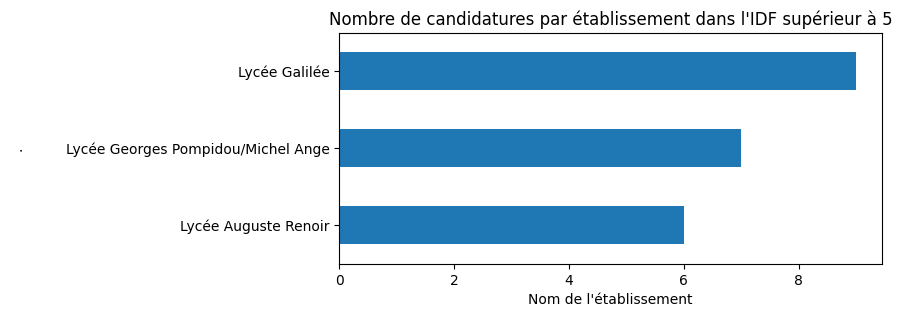

Nom Etablissement origine 2022/2023
Lycée Auguste Renoir                  6
Lycée Georges Pompidou/Michel Ange    7
Lycée Galilée                         9
Name: count, dtype: int64


In [17]:
IDF_92 = ['92']

df_IDF = df_Générale[df_Générale['Département'].isin(IDF_92)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF >= 5]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.', labelpad=30)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)

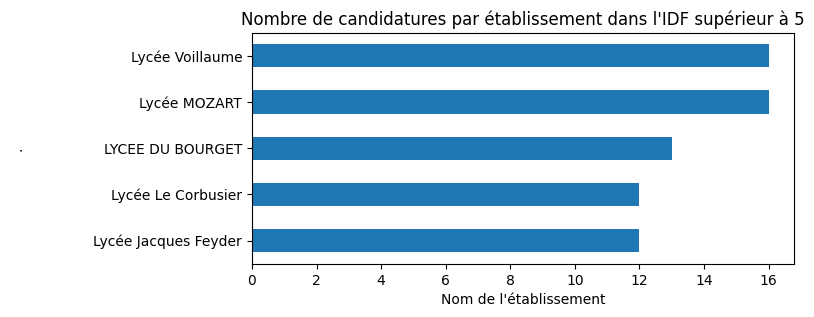

Nom Etablissement origine 2022/2023
Lycée Jacques Feyder    12
Lycée Le Corbusier      12
LYCEE DU BOURGET        13
Lycée MOZART            16
Lycée Voillaume         16
Name: count, dtype: int64


In [18]:
IDF_93 = ['93']

df_IDF = df_Générale[df_Générale['Département'].isin(IDF_93)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF >= 10]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.',labelpad=50)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)

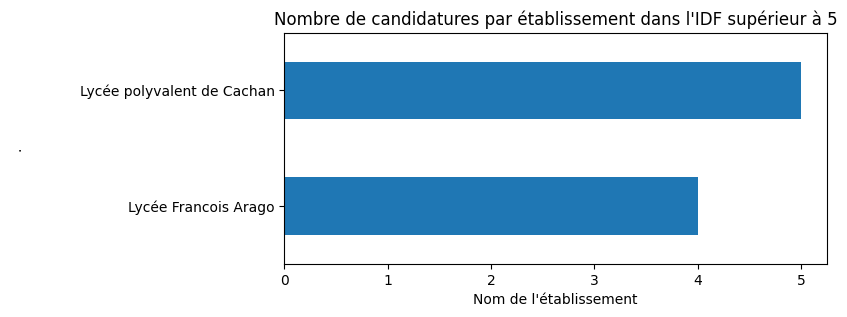

Nom Etablissement origine 2022/2023
Lycée Francois Arago          4
Lycée polyvalent de Cachan    5
Name: count, dtype: int64


In [19]:
IDF_94 = ['94']

df_IDF = df_Générale[df_Générale['Département'].isin(IDF_94)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF >= 3]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.', labelpad=40)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)

### b) Candidats provenant d'STI2D

In [20]:
df = pd.read_excel("GEII_Anonyme.xlsx")

df_Techno = df[df['Série de classe - Libellé 2022/2023'] == 'Sciences et Technologies de l\'Industrie et du Développement Durable']

# Ajout de la colonne "Département" basée sur le code commune
df_Techno['Département'] = df_Techno['Coordonnées - Code commune'].apply(lambda x: str(x)[:2])


# Initialisation de la liste 'Autre'
Autre = []

for dept in df_Techno['Département']:
    if dept not in ['75', '77', '78', '91', '92', '93', '94', '95']:
        Autre.append(dept)

# Remplacement des valeurs
df_Techno['Département'] = df_Techno['Département'].replace(Autre, "Autres")

# Sauvegarde du DataFrame filtré et modifié
TerminaleTechno = 'TerminaleTechno.xlsx'
df_Techno.to_excel(TerminaleTechno, index=False)


df_Techno = pd.read_excel("TerminaleTechno.xlsx")



C:\Users\Rami\AppData\Local\Temp\ipykernel_16136\630396209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Techno['Département'] = df_Techno['Coordonnées - Code commune'].apply(lambda x: str(x)[:2])
C:\Users\Rami\AppData\Local\Temp\ipykernel_16136\630396209.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Techno['Département'] = df_Techno['Département'].replace(Autre, "Autres")


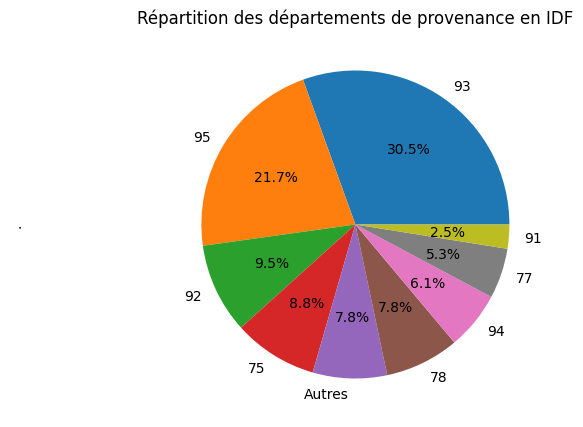

Département
93        145
95        103
92         45
75         42
Autres     37
78         37
94         29
77         25
91         12
Name: count, dtype: int64


In [21]:
# Calcul du nombre de valeurs pour chaque département
value_counts = df_Techno['Département'].value_counts()

# Création du diagramme circulaire
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Répartition des départements de provenance en IDF')
plt.ylabel('.', labelpad=100)
plt.show()

# Affichage du comptage des départements
print(value_counts)

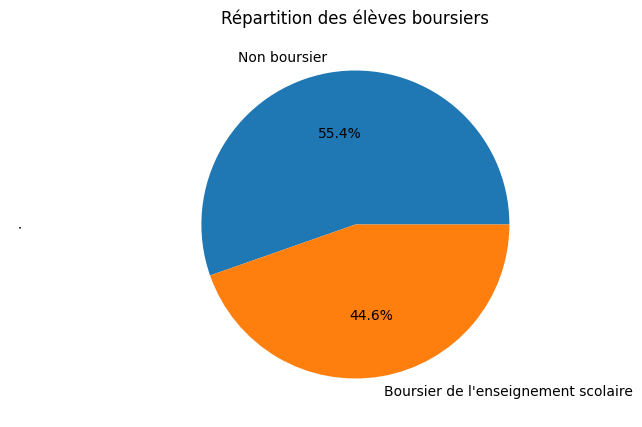

Candidat boursier - Libellé
Non boursier                           263
Boursier de l'enseignement scolaire    212
Name: count, dtype: int64


In [22]:
counts = df_Techno['Candidat boursier - Libellé'].value_counts()

   
plt.figure(figsize=(5, 5)) 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Répartition des élèves boursiers')
plt.ylabel('.', labelpad=100)
plt.show()
print(counts)


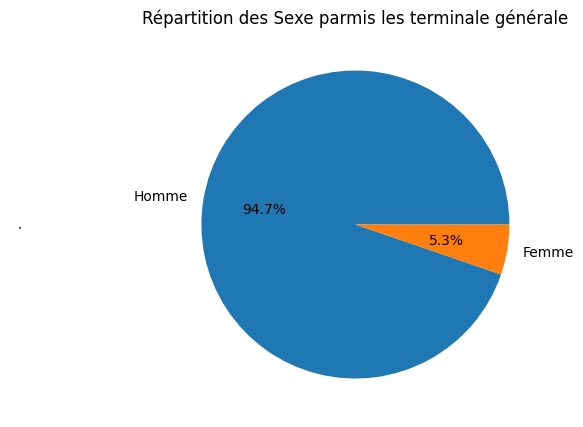

Civilité
Homme    450
Femme     25
Name: count, dtype: int64


In [23]:
df_Techno['Civilité'] = df_Techno['Civilité'].replace({'Mme': 'Femme', 'M.': 'Homme'})
counts = df_Techno['Civilité'].value_counts()

   
plt.figure(figsize=(5, 5)) 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Répartition des Sexe parmis les terminale générale')
plt.ylabel('.', labelpad=100)
plt.show()
print(counts)

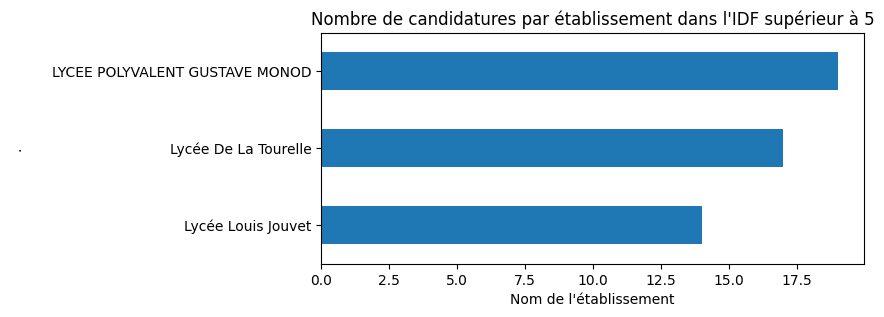

Nom Etablissement origine 2022/2023
Lycée Louis Jouvet                14
Lycée De La Tourelle              17
LYCEE POLYVALENT GUSTAVE MONOD    19
Name: count, dtype: int64


In [24]:
IDF_95 = ['95']

df_IDF = df_Techno[df_Techno['Département'].isin(IDF_95)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF > 10]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.',labelpad=20)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)

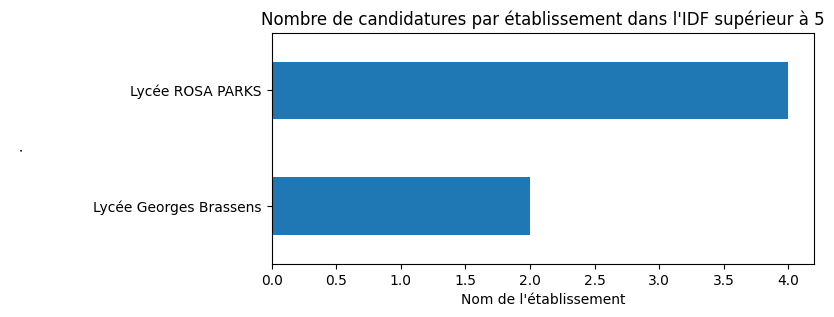

Nom Etablissement origine 2022/2023
Lycée Georges Brassens    2
Lycée ROSA PARKS          4
Name: count, dtype: int64


In [25]:
IDF_91 = ['91']

df_IDF = df_Techno[df_Techno['Département'].isin(IDF_91)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF >= 2]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.', labelpad=50)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)


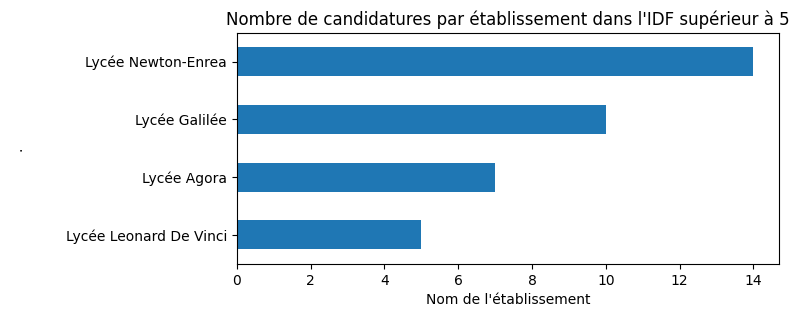

Nom Etablissement origine 2022/2023
Lycée Leonard De Vinci     5
Lycée Agora                7
Lycée Galilée             10
Lycée Newton-Enrea        14
Name: count, dtype: int64


In [26]:
IDF_92 = ['92']

df_IDF = df_Techno[df_Techno['Département'].isin(IDF_92)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF >= 5]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.', labelpad=30)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)

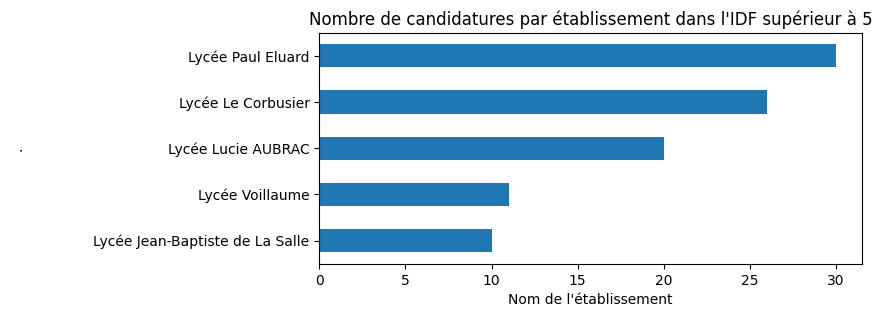

Nom Etablissement origine 2022/2023
Lycée Jean-Baptiste de La Salle    10
Lycée Voillaume                    11
Lycée Lucie AUBRAC                 20
Lycée Le Corbusier                 26
Lycée Paul Eluard                  30
Name: count, dtype: int64


In [27]:
IDF_93 = ['93']

df_IDF = df_Techno[df_Techno['Département'].isin(IDF_93)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF >= 10]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.',labelpad=50)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)


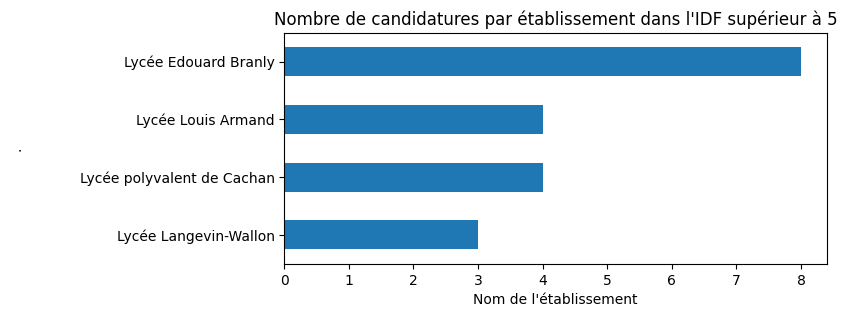

Nom Etablissement origine 2022/2023
Lycée Langevin-Wallon         3
Lycée polyvalent de Cachan    4
Lycée Louis Armand            4
Lycée Edouard Branly          8
Name: count, dtype: int64


In [28]:
IDF_94 = ['94']

df_IDF = df_Techno[df_Techno['Département'].isin(IDF_94)]

comptage_IDF = df_IDF["Nom Etablissement origine 2022/2023"].value_counts(ascending=True)

comptage_IDF_filtré = comptage_IDF[comptage_IDF >= 3]


comptage_IDF_filtré.plot(kind='barh', figsize=(7, 3))  

plt.xlabel('Nom de l\'établissement')
plt.ylabel('.', labelpad=40)
plt.title('Nombre de candidatures par établissement dans l\'IDF supérieur à 5')

plt.show()
print(comptage_IDF_filtré)

<div id="ProcessSelec">
    <h2><center>Processus de Sélection et de Classement des Candidats</center></h2>

À l'origine, nous avions l'intention de classer les étudiants en fonction de leurs notes dans chaque matière qui nous intéressait, en tenant compte de l'ensemble de leurs trimestres et en normalisant les résultats par rapport aux notes moyennes de la classe afin de réduire les disparités. 
    
Cependant, en raison des données incomplète dont nous disposons, cette approche n'a pas été réalisable. 
    
Ainsi, pour la Série Générale, nous avons utilisé les notes d'anglais, de français et de la moyenne des deux épreuves anticipées du Baccalauréat en Terminale. 
    
En revanche, pour la Série Technologique, aucune note n'était disponible. 
    
De plus, étant donné la similitude des parcours scolaires des élèves en STI2D, tous ayant les mêmes spécialités/matières, nous n'avons pas pu les différencier. 
    
Néanmoins, nous avons décidé de les inclure dans le processus de classement.
    
    
De fait, afin d'évaluer et classer les candidats, malgré les limitations de nos données, nous avons adopté les critères de sélections suivantes :

    
### Critères de Sélection
***Candidats Acceptés*** :

- Étudiants issus des séries générales post-réforme.
- Étudiants de la série technologique STI2D.


***Critères d'Exclusion*** :


Les étudiants des séries générales qui n'ont pas choisi les spécialités suivantes en classe de terminale seront exclus :
 - Mathématiques, Sciences de l'Ingénieur OU Physique.
 
***Concernant la Série Technologique*** :


Faute de données précises telles que les matières étudiées et les notes obtenues, tous les étudiants de la série STI2D seront considérés pour la sélection sans exception.


***Procédure Complémentaire*** :
    
Une analyse manuelle sera effectuée pour les profils qui ne sont pas issus de la série STI2D ou des séries générales, mais qui ont étudié les matières suivantes : 

- Mathématiques, Physique et Programmation.

***Traitement manuels***: 
    
    Anciens BAC / DAEU/ Techno/ Année Préparatoire / Bac international
    
</div>

In [29]:
df = pd.read_excel('GEII_Anonyme.xlsx')

Nous avons ci-dessous un premier filtre "math_physic_filter", conçu pour sélectionner les étudiants ayant les spécialités requis, tout en excluant ceux qui ont choisi certaines autres spécialités non conformes aux critères.

In [30]:
math_physic_filter = ( # Cela est le premier filtre nous permettant de choisir seulement les etudiants 
    #ayant Mathematique ou/et Physique
    ((df['EDS Scolarité Terminale 1 - Libellé'] == 'Mathématiques Spécialité') |
    (df['EDS Scolarité Terminale 2 - Libellé'] == 'Mathématiques Spécialité') |
    (df['EDS Scolarité Abandonné - Libellé'] == 'Mathématiques Spécialité') |

    
    (df['EDS Scolarité Terminale 1 - Libellé'] == "Sciences de l'ingénieur") |
    (df['EDS Scolarité Terminale 2 - Libellé'] == "Sciences de l'ingénieur") |
    (df['EDS Scolarité Abandonné - Libellé'] == "Sciences de l'ingénieur") |
    
    (df['EDS Scolarité Terminale 1 - Libellé'] == "Sciences de l'ingénieur et sciences physiques") |
    (df['EDS Scolarité Terminale 2 - Libellé'] == "Sciences de l'ingénieur et sciences physiques") |
    (df['EDS Scolarité Abandonné - Libellé'] == "Sciences de l'ingénieur et sciences physiques"))
    
    &
    
    ((df['EDS Scolarité Terminale 1 - Libellé'] != "Sciences Economiques et Sociales Spécialité") & 
     (df['EDS Scolarité Terminale 1 - Libellé'] != "Arts Plastiques Spécialité") &
     (df['EDS Scolarité Terminale 1 - Libellé'] != "Langues, littératures et cultures étrangères et régionales") &
     (df['EDS Scolarité Terminale 1 - Libellé'] != "Histoire-géographie, géopolitique et sciences politiques")&
     (df['EDS Scolarité Terminale 1 - Libellé'] != "Humanités, littérature et philosophie"))
)



In [31]:
#Le filtre effectif prenant en compte le precedent mais aussi seulement les bacs generaux post-reforme
excel_general= df.loc[(df['Série de classe - Libellé 2022/2023'] == 'Série Générale') & (math_physic_filter)]  


#Le filtre effectif ne prenant que les STI2D
excel_techno= df.loc[
    (df['Série de classe - Libellé 2022/2023'] == "Sciences et Technologies de l'Industrie et du Développement Durable" )] 

### Matrice de coefficients

La matrice des coefficients regroupe les coefficients de chaque trimestre pour chaque matière de nos critères, englobant à la fois les matières de la Série Générale et Technologique. 

Malgré l'utilisation des notes de l'épreuve anticipée seules, nous avons choisi de maintenir la matrice complète, pour chaque semestre, de première à la terminale, afin de permettre une utilisation aisée du programme pour un jeu de données, complets, à savoir, incluant les notes de chaque trimestre.

Cette matrice nous permet d'établir les bonus qui seront attribués à chaque étudiant en fonction de ses choix de spécialités, d'options et de son département. De plus, elle nous offre la flexibilité de modifier facilement le poids de ces bonus. À mesure que le semestre avance, l'importance du coefficient augmente pour évaluer l'assiduité des candidats.

In [32]:
data = {   #La matrice nous indiquant les coefficients de chaque matiere, que ce soit pour les technologiques ou les generaux
    'Maths': [1,2,3,2,3,4,17,8],
    'Physique': [1,2,3,2,3,4,15,8],
    'SI': [1,2,3,2,3,4,12,5],
    'Info': [1,2,3,2,3,4,8,5],
    'Tech Indu' : [1,2,3,2,3,4,8,5],
    
    'Physique et math' : [1,2,3,2,3,4,17,8],
    'Ing,Innov et Dev' : [1,2,3,2,3,4,15,8],
    'Innov Tech' : [1,2,3,2,3,4,12,5],
    'Ing et Dev' : [1,2,3,2,3,4,8,5],
    
    'Francais' : [1,1,1,1,1,1,6,5],
    'Anglais' : [1,1,1,1,1,1,6,5],
    
}
indices = ['P1', 'P2', 'P3', 'T1', 'T2', 'T3', 'Coeff','Planche']

coefficient = pd.DataFrame(data, index=indices)

print (coefficient)

         Maths  Physique  SI  Info  Tech Indu  Physique et math  \
P1           1         1   1     1          1                 1   
P2           2         2   2     2          2                 2   
P3           3         3   3     3          3                 3   
T1           2         2   2     2          2                 2   
T2           3         3   3     3          3                 3   
T3           4         4   4     4          4                 4   
Coeff       17        15  12     8          8                17   
Planche      8         8   5     5          5                 8   

         Ing,Innov et Dev  Innov Tech  Ing et Dev  Francais  Anglais  
P1                      1           1           1         1        1  
P2                      2           2           2         1        1  
P3                      3           3           3         1        1  
T1                      2           2           2         1        1  
T2                      3           3    

Initialement, nous avions pour information que la note correspondant à ce qui est maintenant désigné comme l'épreuve anticipée était celle de la spécialité abandonnée. Par conséquent, nous avons supposé que les autres colonnes portant le libellé correspondaient aux autres matières. Cette hypothèse a conduit à la création du premier dictionnaire, associant les colonnes libellées à leurs colonnes de notes respectives. Bien que les dernières informations aient révélé que ce n'était pas le cas, nous avons décidé de conserver notre dictionnaire, car il pourra être adapté pour correspondre aux bonnes colonnes de notes dans le cadre d'un futur fichier plus complet.

Le deuxième dictionnaire regroupe spécifiquement les notes d'anglais et de français

Le troisème dictionnaire regroupe les options facultatives.

In [33]:
# Nous permet d'associer chaque colonne qui possedent les libellés avec les colonnes ayant les notes
dico_libellé_note = {
                     'EDS Scolarité Terminale 1 - Libellé':"Note de l'épreuve.5",
                     'EDS Scolarité Terminale 2 - Libellé':"Note de l'épreuve.5",
                      "EDS Scolarité Abandonné - Libellé":"Note de l'épreuve",
                     'EDS Scolarité Première 1 - Libellé':"Note de l'épreuve.3",
                     'EDS Scolarité Première 2 - Libellé':"Note de l'épreuve.4"                   
                     }
# Nous permet d'associer chaque colonne qui possedent les libellés avec les colonnes ayant les notes pour chaque trimestre
dico_libellé_tier = {"LV2" : ["Moyenne du Candidat en Langue vivante A pour trimestre 1",
                              "Moyenne du Candidat en Langue vivante A pour trimestre 2",
                              "Moyenne du Candidat en Langue vivante A pour trimestre 3",
                              "Moyenne du Candidat en Langue vivante A pour trimestre 1.1",
                              "Moyenne du Candidat en Langue vivante A pour trimestre 2.1",
                              "Moyenne du Candidat en Langue vivante A pour trimestre 3.1"], 
                    "Francais" : ["Moyenne du Candidat en Français pour trimestre 1",
                                  "Moyenne du Candidat en Français pour trimestre 2",
                                  "Moyenne du Candidat en Français pour trimestre 3",
                                  "Moyenne du Candidat en Français pour trimestre 1.1",
                                  "Moyenne du Candidat en Français pour trimestre 2.1",
                                  "Moyenne du Candidat en Français pour trimestre 3.1"],
                    
                    "LV3" : ["Moyenne du Candidat en Français pour trimestre 1.1", 
                             "Moyenne du Candidat en Français pour trimestre 2.1",
                             "Moyenne du Candidat en Français pour trimestre 3.1",
                             "Moyenne du Candidat en Français pour trimestre 1",
                             "Moyenne du Candidat en Français pour trimestre 2",
                             "Moyenne du Candidat en Français pour trimestre 3"]}
#liste qui regroupe les colonnes repertoriant les options
dico_libellé_option= ["Option facultative 1 Scolarité - Libellé 2022/2023",
                      "Option facultative 2 Scolarité - Libellé 2022/2023"]


Cette fonction nous permet d'associer les notes à un coefficient selon la matière.

In [34]:
#Fonction qui nous permet d'associer les notes a un coefficient selon la matiere, pour les matieres principales
def ajout_coef(Dataframe,colonne_libellé,ligne_etudiant): 
    
    #Nous permet de recuper la case de la note selon le libellé provenant d'une autre colonne grace au dico_libellé_note
    note_with_coef = (Dataframe[dico_libellé_note[colonne_libellé]][ligne_etudiant]) 
    matiere = Dataframe[colonne_libellé][ligne_etudiant] #Nous permet de recuperer le libellé des matieres
    
    if not(np.isnan(note_with_coef)): #on verifie si la matiere a une note, pour ne pas faussé la moyenne
        if matiere == "Mathématiques Spécialité": #on verifie qu'elle est la matiere associé a la note pour choisi son coef
            #rajoute au dictionnaire de l'etudiant, note associé au coef
            note_etu[note_with_coef] = coefficient["Maths"]["Coeff"] 
        elif matiere == "Physique-Chimie Spécialité": 
            note_etu[note_with_coef] = coefficient["Physique"]["Coeff"]
        elif matiere == "Numérique et Sciences Informatiques":
            note_etu[note_with_coef] = coefficient["Info"]["Coeff"]
        elif matiere == "Sciences de l'ingénieur et sciences physiques":
            note_etu[note_with_coef] = coefficient["SI"]["Coeff"]
        elif matiere == "Sciences de l'ingénieur":
            note_etu[note_with_coef] = coefficient["SI"]["Coeff"]
        
        elif matiere == 'Physique-Chimie et Mathématiques':
            note_etu[note_with_coef] = coefficient["Physique et math"]["Coeff"]
        elif matiere == 'Ingénierie, innovation et développement durable':
            note_etu[note_with_coef] = coefficient['Ing,Innov et Dev']["Coeff"]
        elif matiere == 'Innovation Technologique':
            note_etu[note_with_coef] = coefficient['Innov Tech']["Coeff"]
        elif matiere == "Ingénierie et développement durable":
            note_etu[note_with_coef] = coefficient['Ing et Dev']["Coeff"]
            

Cette fonction permet aussi de rajouter un coefficient aux notes, mais pour les matières Anglais et Francais.

In [35]:
#Fonction qui nous permet d'associer les notes a un coefficient selon la matiere, 
#pour les matieres secondaire, vu que leur mise en forme est differente dans la Dataframe
def ajout_coef_tier(Dataframe,ligne_etudiant): 
    note_tier= {} # Initialisation du dictionnaire qui contiendra les notes des trimestres associés a leur coefficient
    
    #Nous permet de ne pas traité le dernier element du dictionnaire, 
    #le laissant pour acceuillir les trimestres si l'etudiant a Anglais LV3
    for matiere in list(dico_libellé_tier.keys())[:-1]: 
        #Le teste pour sa voir si l'etudiant a Anglais LV2 ou non
        if Dataframe["Langue vivante A scolarité - Libellé 2022/2023"][ligne_etudiant] != "Anglais" and matiere == "LV2": 
            matiere = "LV3" #Si oui, la variable matiere = "LV3", pour recuperer specifiquement leurs notes d'Anglais
        
        for trimestre in range(len(dico_libellé_tier[matiere])): #Le For pour lister tout les trimestres associé a la matiere
            note_with_coef = (Dataframe[dico_libellé_tier[matiere][trimestre]][ligne_etudiant]) #recupere la note grace au dictionnaire dico_libellé_tier
           
            if  not(pd.isna(note_with_coef) | (isinstance(note_with_coef , (str)))):#teste si la case n'est pas vite ou contient un string, puis teste si c'est la matiere de Francais ou d'Anglais
                if matiere == "Francais": 
                    note_tier[note_with_coef] = coefficient["Francais"][indices[trimestre]]
                elif matiere == "LV2" or matiere =="LV3":
                    note_tier[note_with_coef] = coefficient["Anglais"][indices[trimestre]]          
                
        if matiere == "Francais": #Nous refaisons un test si pour savoir si ce sont les notes d'Anglais ou de Francais puis nous utilisions la fonction "calc_placement" pour calculer la moyenne global de la note et en suite on lui rajoute son coeff final
            note_etu[calc_placement(note_tier)] = coefficient["Francais"]["Coeff"]
            
        elif matiere == "LV2" or matiere =="LV3":
            note_etu[calc_placement(note_tier)] = coefficient["Anglais"]["Coeff"]
                 

Cette fonction nous permet à la fin, de calculer le placement des étudiants en calculant leur moyenne pondérée.

In [36]:
def calc_placement(ajout_coef): #Fonction qui nous permet de calculer la moyenne ponderee
      
    if all(key == 0 or value == 0 for key, value in ajout_coef.items()): #verifie que l'etudiant a au moins une note
        return 0.0 #Si ce n'est pas le cas, retourne 0.0, ce qui supprime l'erreur de la division par 0
    valeurs = ajout_coef.keys()
    coefficients = ajout_coef.values()
    moyenne_ponderee = sum(valeur * coef for valeur, coef in zip(valeurs, coefficients)) / sum(coefficients) #Calcule la moyenne selon les notes et les coefficients associés
    return moyenne_ponderee

Cette matrice nous permet d'avoir le bonus qu'on va attribuer à chaque étudiant pour le choix des spécialités et de ses options. La matrice nous donne la possibilité de changer le poids des bonus facilement.

In [37]:
#Une matrice regroupant les bonus liés a leur lieu de vie et aux spécialités et options selon leur importance
bonus_note = {'Mathématiques Spécialité':[0.3, 0.2, 0.2, 0,0],
              "Sciences de l'ingénieur" : [0.3, 0.2, 0.2, 0,0],
              "Physique-Chimie Spécialité": [0.2, 0.1, 0.1, 0,0],
              "Sciences de l'ingénieur et sciences physiques": [0.25, 0.17, 0.17, 0,0],
              "Numérique et Sciences Informatiques": [0.2, 0.1, 0.1, 0,0],
              
              "Mathématiques Expertes" : [0,0,0,0.3,0],
              "Mathématiques Complémentaires" : [0,0,0,0.2,0],
              
              "Location" : [0,0,0,0,0.5]}
indexs = ["EDS1", "EDS2","EDSA","Option","Departement"]
bonus_matrice = pd.DataFrame(bonus_note, index=indexs)


Cette dernière fonction nous permet d'ajouter les bonus à chaque étudiant après le calcul de leurs notes de classement.

In [38]:
#Fonction qui nous permet de rajouter un bonus  a la note de classement selon les matieres et options choisi par les etudiants
def ajout_bonus(data_filtré):
    
    for index_etu in data_filtré.index:
        for libellé_matiere in list(dico_libellé_note.keys())[:-2]:
            if libellé_matiere == 'EDS Scolarité Terminale 1 - Libellé': taille_bonus = "EDS1"
            if libellé_matiere == 'EDS Scolarité Terminale 2 - Libellé' : taille_bonus ="EDS2"
            if libellé_matiere == "EDS Scolarité Abandonné - Libellé" : taille_bonus = "EDSA"
            
            if data_filtré[libellé_matiere][index_etu] == 'Mathématiques Spécialité': #Verifie le libellé de la matiere
                data_filtré["Resultat classement"][index_etu] += bonus_matrice['Mathématiques Spécialité'][taille_bonus] #rajoute le bonus de note selon la matiere
            elif data_filtré[libellé_matiere][index_etu] =="Sciences de l'ingénieur":
                data_filtré["Resultat classement"][index_etu] += bonus_matrice["Sciences de l'ingénieur"][taille_bonus]
            elif data_filtré[libellé_matiere][index_etu] =="Physique-Chimie Spécialité":
                data_filtré["Resultat classement"][index_etu] += bonus_matrice["Physique-Chimie Spécialité"][taille_bonus]
            elif data_filtré[libellé_matiere][index_etu] =="Sciences de l'ingénieur et sciences physiques":
                data_filtré["Resultat classement"][index_etu] += bonus_matrice["Sciences de l'ingénieur et sciences physiques"][taille_bonus]
            elif data_filtré[libellé_matiere][index_etu] =="Numérique et Sciences Informatiques":
                data_filtré["Resultat classement"][index_etu] += bonus_matrice["Numérique et Sciences Informatiques"][taille_bonus]
                
        for libellé_option in dico_libellé_option:    
            if data_filtré[libellé_option][index_etu] =="Mathématiques Expertes":
                data_filtré["Resultat classement"][index_etu] += bonus_matrice["Mathématiques Expertes"]["Option"]
            elif data_filtré[libellé_option][index_etu] =="Mathématiques Complémentaires":
                data_filtré["Resultat classement"][index_etu] += bonus_matrice["Mathématiques Complémentaires"]["Option"]
        #Cette condition nous permet de verifier le code postal de l'etudiant et rajouter un bonus si celui la est proche de celui de Villetaneuse
        if str(data_filtré["Coordonnées - Code commune"][index_etu]).startswith("95") | str(data_filtré["Coordonnées - Code commune"][index_etu]).startswith("75") |str(data_filtré["Coordonnées - Code commune"][index_etu]).startswith("93") | str(data_filtré["Coordonnées - Code commune"][index_etu]).startswith("92") | str(data_filtré["Coordonnées - Code commune"][index_etu]).startswith("94") :
            data_filtré["Resultat classement"][index_etu] += bonus_matrice["Location"]["Departement"]

 

Voici le code effectif du programme permettant de classer les étudiants en utilisant les fonctions précédents.

In [39]:
resultat_classment_generaux=[] #tableau qui va contenir toutes la note de classement pour chaque etudiants
for j in excel_general.index: # Boucle For qui liste tout les index pour s'assurer de ne pas faire de glissement, que chaque note de classmeent soit associé au bon etudiant
    
    note_etu={} #Dictionnaire qui va acceuillir toutes les notes et leur coefficient associé, nous permettant de calculer la note de classement
    for i in dico_libellé_note:
        ajout_coef(excel_general,i,j) #Nous utilisons les fonctions vu precedement pour ajouter les notes au sein de note_etu
        ajout_coef_tier(excel_general,j)
       
    resultat_classment_generaux.append(calc_placement(note_etu)) # Et pour finir nous calculons la note de classement qu'on integrera au sin de resultat_classment, puis ca bouclera pour le prochain etudiant
    
excel_general["Resultat classement"]= resultat_classment_generaux # A la fin de la boucle de traitement, nous rajoutons a la Dataframe, les resultat de classement

ajout_bonus(excel_general)
excel_general = excel_general.sort_values(by = "Resultat classement", ascending=False) #On trie en utilisant la fonction .sort_values() en fonction de "Resultat classement"

excel_general = excel_general.reset_index(drop=True) # Réinitialiser l'index pour s'assurer qu'il est dans l'ordre croissant
excel_general['Position dans le classement'] = np.where(excel_general.index < 655, excel_general.index + 1, 'NC') # Ajouter une nouvelle colonne énumérant de 1 à 655, puis "NC" pour les valeurs au-delà

excel_general.to_excel("Excel_general_resultat.xlsx", index ='FALSE')
print(excel_general)


C:\Users\Rami\AppData\Local\Temp\ipykernel_16136\2810633028.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excel_general["Resultat classement"]= resultat_classment_generaux # A la fin de la boucle de traitement, nous rajoutons a la Dataframe, les resultat de classement
C:\Users\Rami\AppData\Local\Temp\ipykernel_16136\567731404.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtré["Resultat classement"][index_etu] += bonus_matrice['Mathématiques Spécialité'][taille_bonus] #rajoute le bonus de note selon la matiere
C:\Users\Rami\AppData\Local\Temp\

       ID  Groupe candidat - Code Classement  Aménagement Civilité  \
0     895                    7414          1          NaN       M.   
1    1585                    7414          5          NaN      Mme   
2     344                    7414         20          NaN      Mme   
3     941                    7414         11          NaN      Mme   
4    1119                    7414         33          NaN       M.   
..    ...                     ...        ...          ...      ...   
647   430                    7414         NC          NaN       M.   
648   928                    7414         NC          NaN       M.   
649  1193                    7414       ENCF          NaN       M.   
650  1794                    7414         NC          NaN       M.   
651   426                    7414       ENCF          NaN       M.   

    Date Naissance  Coordonnées - Code commune Coordonnées - Libellé commune  \
0       2007-08-18                     64430.0                        Orthez   

In [40]:
resultat_classment_techno=[] #tableau qui va contenir toutes la note de classement pour chaque etudiants
for j in excel_techno.index: # Boucle For qui liste tout les index pour s'assurer de ne pas faire de glissement, que chaque note de classmeent soit associé au bon etudiant
    
    note_etu={} #Dictionnaire qui va acceuillir toutes les notes et leur coefficient associé, nous permettant de calculer la note de classement
    for i in dico_libellé_note:
        ajout_coef(excel_techno,i,j) #Nous utilisons les fonctions vu precedement pour ajouter les notes au sein de note_etu
        ajout_coef_tier(excel_techno,j)
       
    resultat_classment_techno.append(calc_placement(note_etu)) # Et pour finir nous calculons la note de classement qu'on integrera au sien de resultat_classment, puis ca bouclera pour le prochain etudiant
    
    
excel_techno["Resultat classement"]= resultat_classment_techno # A la fin de la boucle de traitement, nous rajoutons a la Dataframe, les resultat de classement
excel_techno = excel_techno.sort_values(by = "Resultat classement", ascending=False) #On trie en utilisant la fonction .sort_values() en fonction de "Resultat classement"

excel_techno = excel_techno.reset_index(drop=True) # Réinitialiser l'index pour s'assurer qu'il est dans l'ordre croissant
excel_techno['Position dans le classement'] =np.where(excel_techno.index < 316, excel_techno.index + 1, 'NC') # Ajouter une nouvelle colonne énumérant de 1 à 655, puis "NC" pour les valeurs au-delà
excel_techno.to_excel("Excel_techno_resultat.xlsx", index ='FALSE')
print(excel_techno)


C:\Users\Rami\AppData\Local\Temp\ipykernel_16136\2420968865.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excel_techno["Resultat classement"]= resultat_classment_techno # A la fin de la boucle de traitement, nous rajoutons a la Dataframe, les resultat de classement


       ID  Groupe candidat - Code Classement  Aménagement Civilité  \
0     962                  142308        263          NaN       M.   
1      16                  142308         NC          NaN       M.   
2    1415                  142308         NC          NaN       M.   
3    1464                  142308         NC          NaN       M.   
4    1461                  142308        211          NaN       M.   
..    ...                     ...        ...          ...      ...   
470   788                  142308        222          NaN       M.   
471   786                  142308        221          NaN      Mme   
472   785                  142308         NC          NaN       M.   
473   784                  142308        106          NaN       M.   
474  1854                  142308       ENCF          NaN       M.   

    Date Naissance  Coordonnées - Code commune Coordonnées - Libellé commune  \
0       2004-11-09                     93050.0             Neuilly-sur-Marne   

Ainsi, nous avons deux fichier finaux générés, "Excel_techno_resultat.xlsx" et "Excel_general_resultat.xlsx"